The purpose of this notebook is to demonstrate how to represent a function on the interval [-1,1] as a [Fourier series expansion](http://mathworld.wolfram.com/FourierSineSeries.html).

First, we must import the necessary files.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

from matplotlib import animation, rc
from IPython.display import HTML

Now we define the function $f(x)$.

In [2]:
def f(x):
    if x >= -1 and x < 0:
        return 1 + x
    elif x >= 0 and x <= 1:
        return 1.0 - x
    else:
        print("Invalid x value.")
        exit()

Now we graph the function to see what it looks like.

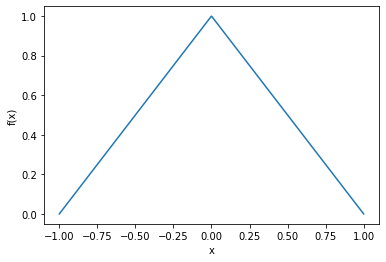

In [3]:
x = np.linspace(-1,1,1000)
y = [f(xx) for xx in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

The function $f(x)$ can be represented as an expansion over sines and cosines: $f(x) = \frac{1}{2} a_0^{(1)} + \sum_{n=1}^\infty a_n^{(1)} \phi_n^{(1)} + \sum_{n=1}^\infty a_n^{(2)}\phi_n^{(2)}(x)$.  The functions $\phi_n^{(1)}(x) = \cos(n\pi x)$ and $\phi_n^{(2)}(x) = \sin(n\pi x)$ are the basis functions for the expansion.  We may graph them for the first few values of $n$.


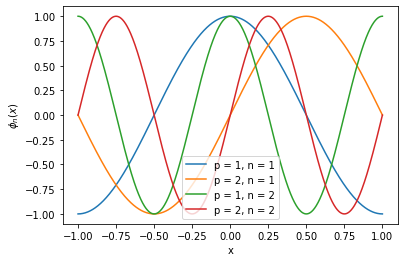

In [4]:
def phi(p, n, x):
    if p == 1:
        return np.cos(n * np.pi * x)
    elif p == 2:
        return np.sin(n * np.pi * x)
    else:
        print("Invalid p.")
        exit()

plt.plot(x, phi(1,1,x), label = 'p = 1, n = 1')
plt.plot(x, phi(2,1,x), label = 'p = 2, n = 1')
plt.plot(x, phi(1,2,x), label = 'p = 1, n = 2')
plt.plot(x, phi(2,2,x), label = 'p = 2, n = 2')

plt.xlabel('x')
plt.ylabel('$\phi_n(x)$')
plt.legend()
plt.show()

The coefficients $a_n^{(j=1,2)}$ in the expansion are given by $a_n^{(j)} = \int_0^1 dx f(x) \phi_n^{(j)}(x)$.  For the special case of $n=0$, we divide by 2.  We may compute them by doing the integral for a range of $n$ values.

In [5]:
def a(p, n):
    result = integrate.quad(lambda t: f(t) * phi(p, n,t), -1, 1)
    if n == 0:
        return result[0] * 0.5
    else:
        return result[0]
    
m = 50
a1 = [a(1,n) for n in range(0,m+1)]
a2 = [a(2,n) for n in range(0,m+1)]    

Here are the coefficients as a function of their index.

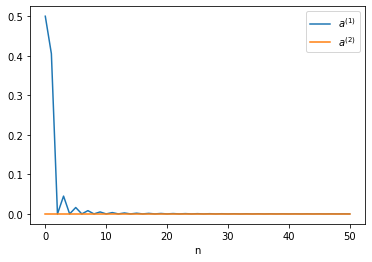

In [6]:
plt.plot(a1, label = '$a^{(1)}$')
plt.plot(a2, label = '$a^{(2)}$')
plt.xlabel('n')
plt.legend()
plt.show()

With the coefficients, we can compute our approximation to $f(x)$ as $z^{(m)}(x) = \sum_{n=0}^m a_n^{(1)} \phi_n^{(1)} + \sum_{n=0}^m a_n^{(2)}\phi_n^{(2)}(x)$.

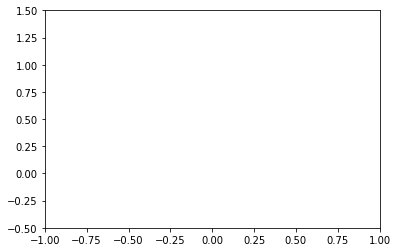

In [7]:
fig, ax = plt.subplots()

ax.set_xlim((-1,1))
ax.set_ylim((-0.5, 1.5))

line, = ax.plot([], [], lw=2)

In [8]:
def init():
    line.set_data([], [])
    return (line,)

In [9]:
def animate(i):
    z = np.zeros(len(x))
    for n in range(0, i+1):
        z += a1[n] * phi(1,n,x) + a2[n] * phi(2,n,x)
    line.set_data(x, z)
    return (line,)

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=m,
                               blit=True)

We now plot $f(x)$ and $z^{(m)}(x)$ vs. x.

In [11]:
HTML(anim.to_jshtml())